<a href="https://colab.research.google.com/github/Gottyokit/LearningAndPractice/blob/main/JustTesting001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[Preprocesamiento] Muestra de datos sintéticos generados:
+------------------------------------------+------------------------------------------------+--------------+---------------+
|               Original (X)               |                 Sintético (X)                  | Original (y) | Sintético (y) |
+------------------------------------------+------------------------------------------------+--------------+---------------+
| [27.5, 24.0, 9.1, 303.0, 7500.0, 1500.0] | [27.54, 23.96, 9.19, 302.97, 7500.05, 1499.99] |     0.18     |     0.195     |
| [27.3, 24.8, 9.2, 303.0, 6700.0, 2500.0] | [27.33, 24.69, 9.26, 302.96, 6700.0, 2500.09]  |     0.28     |     0.291     |
| [28.0, 25.0, 9.3, 303.0, 6000.0, 2000.0] | [28.02, 24.98, 9.19, 302.98, 5999.96, 2000.02] |     0.22     |     0.231     |
+------------------------------------------+------------------------------------------------+--------------+---------------+
Época  20 | Train Loss: 0.0685 | Val Loss: 0.0704
Época  40 | Trai

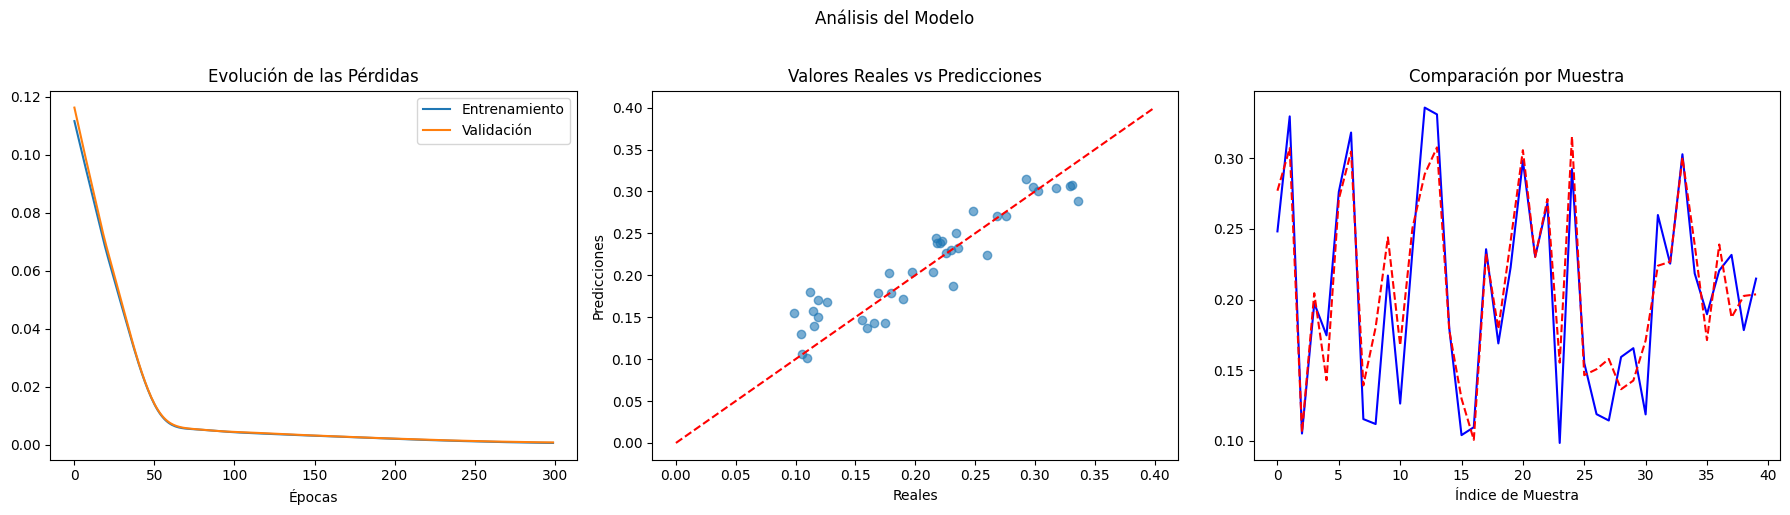

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from tabulate import tabulate  # Para mostrar datos en tablas

# ==================================================================
# [1] Función mejorada para generar y mostrar datos sintéticos
# ==================================================================
def generate_synthetic_data(base_X, base_y, num_samples=50):
    """Genera datos sintéticos y muestra 3 ejemplos representativos"""
    X, y = [], []
    examples = []  # Almacena ejemplos para mostrar

    for _ in range(num_samples):
        idx = np.random.randint(0, len(base_X))
        # Generar muestra con ruido controlado
        noise = np.random.normal(0, 0.05, len(base_X[idx]))
        synthetic_sample = np.array(base_X[idx]) + noise
        synthetic_target = base_y[idx] + np.random.normal(0, 0.015)

        # Guardar primeros 3 ejemplos
        if _ < 3:
           examples.append({
    "Original (X)": np.round(base_X[idx], 2).tolist(),  # Convertir a lista
    "Sintético (X)": np.round(synthetic_sample, 2).tolist(),  # Convertir a lista
    "Original (y)": float(base_y[idx]),  # Asegurar formato escalar
    "Sintético (y)": round(float(synthetic_target), 3)  # Asegurar formato escalar
})


        X.append(synthetic_sample)
        y.append(np.clip(synthetic_target, 0.0, 0.5))  # Limitar valores

    # Mostrar tabla de ejemplos
    print("\n[Preprocesamiento] Muestra de datos sintéticos generados:")
    print(tabulate(examples, headers="keys", tablefmt="pretty", stralign="center"))

    return np.array(X), np.array(y)

# ==================================================================
# [2] Datos originales (solo referencia, no usados directamente)
# ==================================================================
base_data = {
    "X": [
        [27.9, 23.3, 9.54, 303.0, 4254.0, 0],
        [28.3, 26.1, 9.01, 303.0, 8191.0, 0],
        [26.6, 24.6, 9.01, 303.0, 9023.0, 4012],
        [27.2, 22.5, 8.48, 303.0, 4077.0, 0],
        [28.0, 25.0, 9.30, 303.0, 6000.0, 2000],
        [27.5, 24.0, 9.10, 303.0, 7500.0, 1500],
        [26.8, 23.5, 8.90, 303.0, 5000.0, 1000],
        [27.3, 24.8, 9.20, 303.0, 6700.0, 2500],
        [28.1, 25.6, 9.50, 303.0, 7200.0, 3000],
        [26.9, 22.7, 8.70, 303.0, 4800.0, 500]
    ],
    "y": [0.30, 0.20, 0.10, 0.25, 0.22, 0.18, 0.15, 0.28, 0.32, 0.12]
}

# ==================================================================
# [3] Generación de datos sintéticos (llamada a la función)
# ==================================================================
X_train, y_train = generate_synthetic_data(base_data["X"], base_data["y"], num_samples=200)

# Datos de prueba (punto único de modificación)
X_test = [[26.6, 25.7, 9.01, 303.0, 8040.0, 3937]]
y_test = [0.15]

# ==================================================================
# [4] Preprocesamiento (sin cambios)
# ==================================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==================================================================
# [5] Definición del modelo (sin cambios)
# ==================================================================
class ImprovedModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 32), nn.ReLU(),
            nn.Linear(32, 16), nn.ReLU(),
            nn.Linear(16, 8), nn.ReLU(),
            nn.Linear(8, 1), nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

# ==================================================================
# [6] Configuración de entrenamiento (sin cambios)
# ==================================================================
model = ImprovedModel(X_train_scaled.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5)
loss_fn = nn.MSELoss()

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Conversión a tensores
train_data = torch.tensor(X_train_split, dtype=torch.float32)
train_targets = torch.tensor(y_train_split, dtype=torch.float32).view(-1, 1)
val_data = torch.tensor(X_val_split, dtype=torch.float32)
val_targets = torch.tensor(y_val_split, dtype=torch.float32).view(-1, 1)

# ==================================================================
# [7] Entrenamiento con Early Stopping (sin cambios)
# ==================================================================
train_losses, val_losses = [], []
best_loss, patience, bad_epochs = float('inf'), 15, 0

for epoch in range(300):
    # Fase de entrenamiento
    model.train()
    optimizer.zero_grad()
    outputs = model(train_data)
    loss = loss_fn(outputs, train_targets)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Fase de validación
    model.eval()
    with torch.no_grad():
        val_preds = model(val_data)
        val_loss = loss_fn(val_preds, val_targets).item()
        val_losses.append(val_loss)

    # Early stopping
    if val_loss < best_loss:
        best_loss, bad_epochs = val_loss, 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        bad_epochs += 1

    if bad_epochs >= patience:
        print(f'\n[Entrenamiento] Early stopping en época {epoch+1}')
        break

    if (epoch+1) % 20 == 0:
        print(f'Época {epoch+1:3d} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss:.4f}')

# ==================================================================
# [8] Evaluación final (sin cambios)
# ==================================================================
model.load_state_dict(torch.load('best_model.pth', weights_only=True))
model.eval()
with torch.no_grad():
    test_data = torch.tensor(X_test_scaled, dtype=torch.float32)
    test_pred = model(test_data).item()

val_preds = model(val_data).detach().numpy().flatten()

# Cálculo de métricas
mae = mean_absolute_error(y_val_split, val_preds)
rmse = np.sqrt(mean_squared_error(y_val_split, val_preds))
r2 = r2_score(y_val_split, val_preds)

# ==================================================================
# [9] Resultados y visualización (sin cambios)
# ==================================================================
print('\n' + '='*50)
print(f'Predicción en prueba: {test_pred:.4f} (Valor real: {y_test[0]})')
print(f'MAE:  {mae:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²:   {r2:.4f}')
print('='*50)

# Gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Análisis del Modelo', y=1.02)

# Gráfico de pérdidas
axes[0].plot(train_losses, label='Entrenamiento')
axes[0].plot(val_losses, label='Validación')
axes[0].set_title('Evolución de las Pérdidas')
axes[0].set_xlabel('Épocas')
axes[0].legend()

# Gráfico de dispersión
axes[1].scatter(y_val_split, val_preds, alpha=0.6)
axes[1].plot([0, 0.4], [0, 0.4], 'r--')
axes[1].set_title('Valores Reales vs Predicciones')
axes[1].set_xlabel('Reales')
axes[1].set_ylabel('Predicciones')

# Comparación punto a punto
indices = np.arange(len(y_val_split))
axes[2].plot(indices, y_val_split, 'b-', label='Reales')
axes[2].plot(indices, val_preds, 'r--', label='Predicciones')
axes[2].set_title('Comparación por Muestra')
axes[2].set_xlabel('Índice de Muestra')

plt.tight_layout()
plt.show()
